In [1]:
import pandas as pd
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
# הדפסת כל הקבצים בתיקייה (שימי את הנתיב האמיתי כאן)
folder_path = '/content/drive/MyDrive/Final_Project_PapaJohns'
files = os.listdir(folder_path)
print(files)

['cleaned_data.csv', 'christian_map_path.csv', 'All_years.csv', 'desc_encoding_map.csv', 'jewish_map_path.csv', 'category_mapping.csv', '1_3_2025.csv', 'cleaned_data_with_sales_channel.csv']


In [11]:
import pandas as pd

# Asegurate de tener acceso al archivo correcto en tu Google Drive
file_path = f"{folder_path}/All_years.csv"

In [12]:
df_temp = pd.read_csv(file_path)
print(df_temp.columns)
df_temp.head()

Index(['Date', 'Month', 'סוג פריט', 'תאור סוג', 'מס' פריט', 'תאור פריט',
       'הזמנה', 'כמות', 'סכום', 'הנחה לפריט', 'אחרי הנחה', 'Is_original'],
      dtype='object')


<ipython-input-12-9dc8f7487e31>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path)


,Date,Month,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Is_original
0,2022-01-01,1,0.0,NaN,67,NaN,14328.0,1,4.95,0.0,4.95,1
1,2022-01-01,1,0.0,NaN,67,NaN,14354.0,2,9.90,0.0,9.90,1
2,2022-01-01,1,1.0,פיצות מיוחדות 14',4,ביאנקה 14' [],14321.0,1,85.90,0.0,85.90,1
3,2022-01-01,1,1.0,פיצות מיוחדות 14',7,טוסקנית 14' [],14304.0,1,85.90,0.0,85.90,1
4,2022-01-01,1,1.0,פיצות מיוחדות 14',13,המומלצת 14' [],14358.0,1,89.90,0.0,89.90,1


In [13]:
# Cargamos el CSV y parseamos fechas
df = pd.read_csv(file_path, parse_dates=['Date'])

<ipython-input-13-993ff5659886>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['Date'])


In [14]:
df.rename(columns={'Date': 'date'}, inplace=True)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.to_period("M")
df['weekday'] = df['date'].dt.day_name()

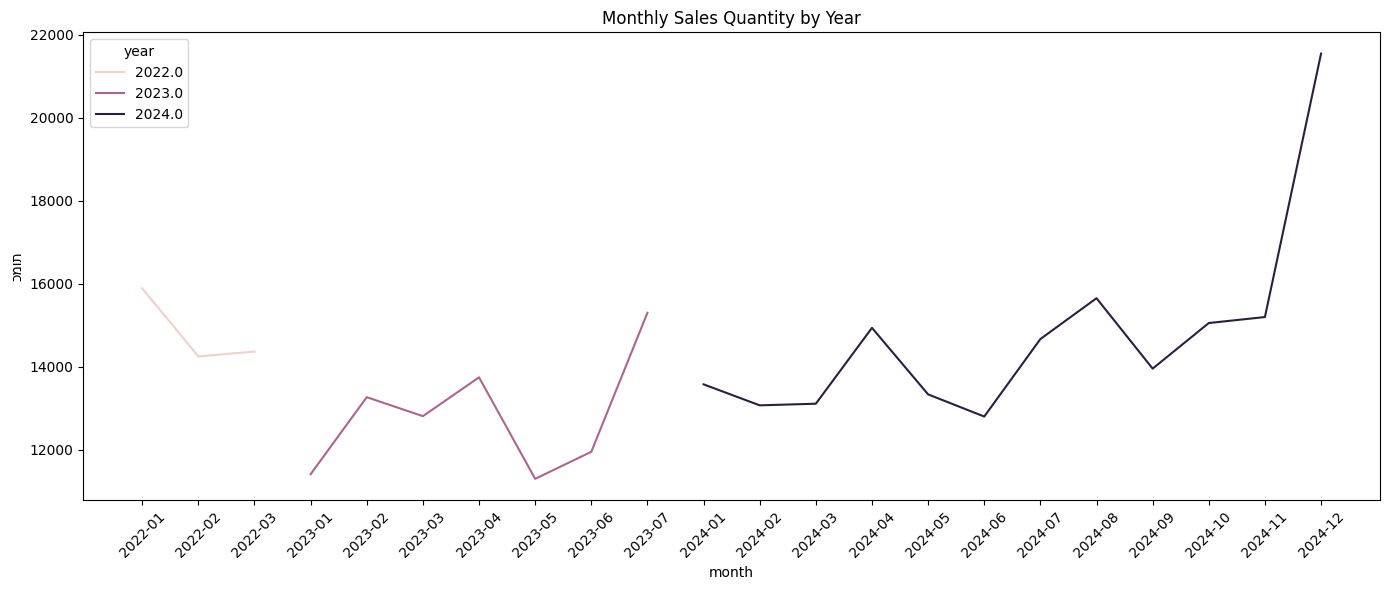

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_sales = df.groupby(['year', 'month'])['כמות'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='month', y='כמות', hue='year')
plt.xticks(rotation=45)
plt.title('Monthly Sales Quantity by Year')
plt.tight_layout()
plt.show()

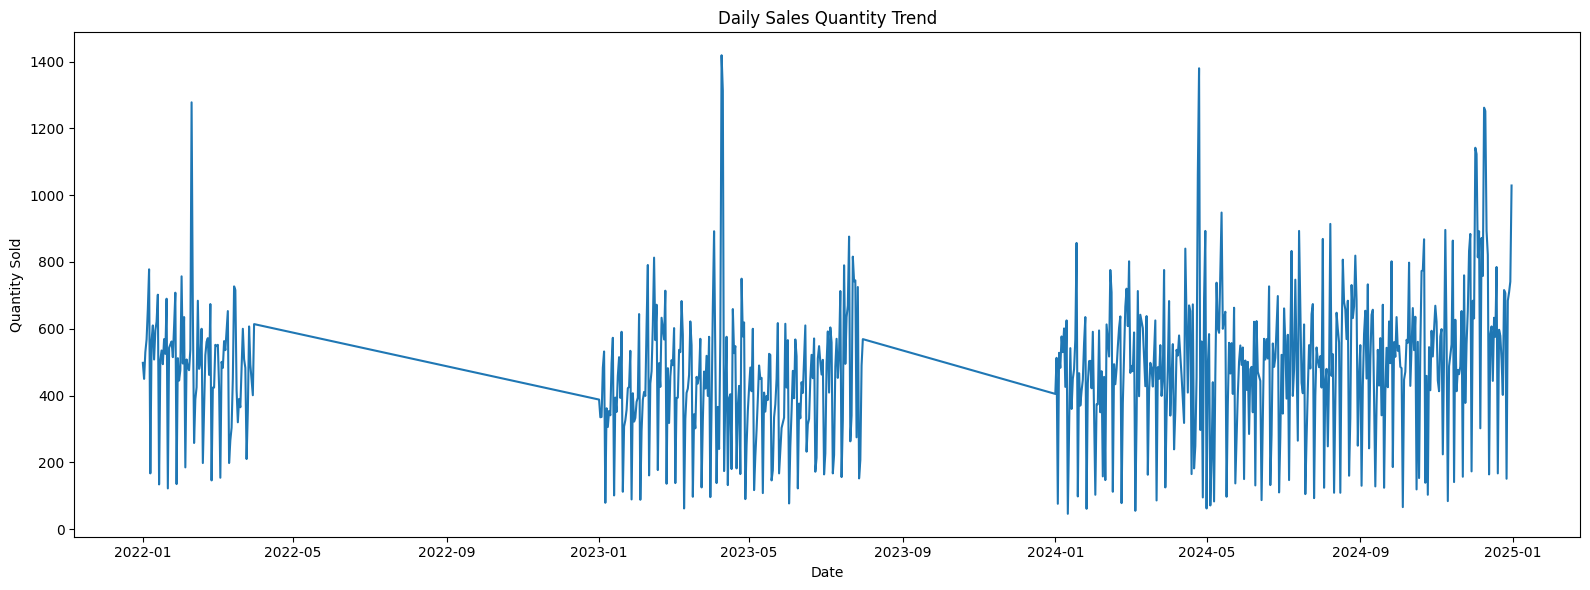

In [19]:
# Agrupamos por fecha y sumamos la cantidad vendida
daily_sales = df.groupby('date')['כמות'].sum().reset_index()

# Graficamos la serie temporal diaria
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6))
sns.lineplot(data=daily_sales, x='date', y='כמות')
plt.title("Daily Sales Quantity Trend")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()


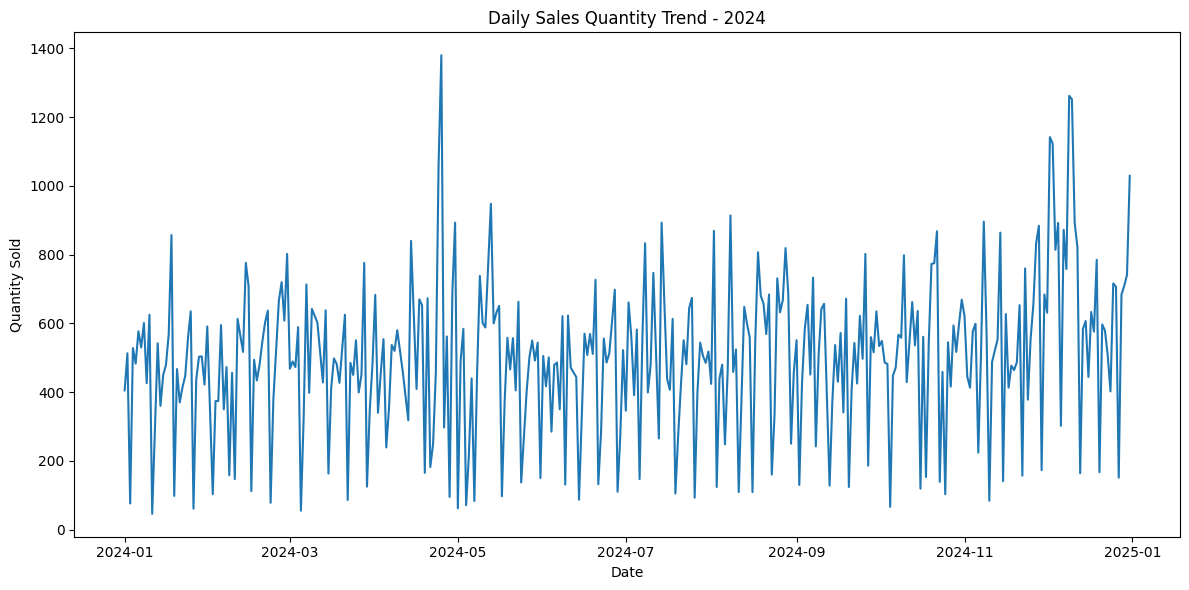

In [21]:
# Filtramos solo datos del año 2024
df_2024 = df[df['year'] == 2024]

# Agrupamos por fecha
daily_sales_2024 = df_2024.groupby('date')['כמות'].sum().reset_index()

# Graficamos
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales_2024, x='date', y='כמות')
plt.title("Daily Sales Quantity Trend - 2024")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()


<ipython-input-47-18fa7c57ebcb>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_sales, y='Item Type', x='Quantity Sold', palette='Blues_d')


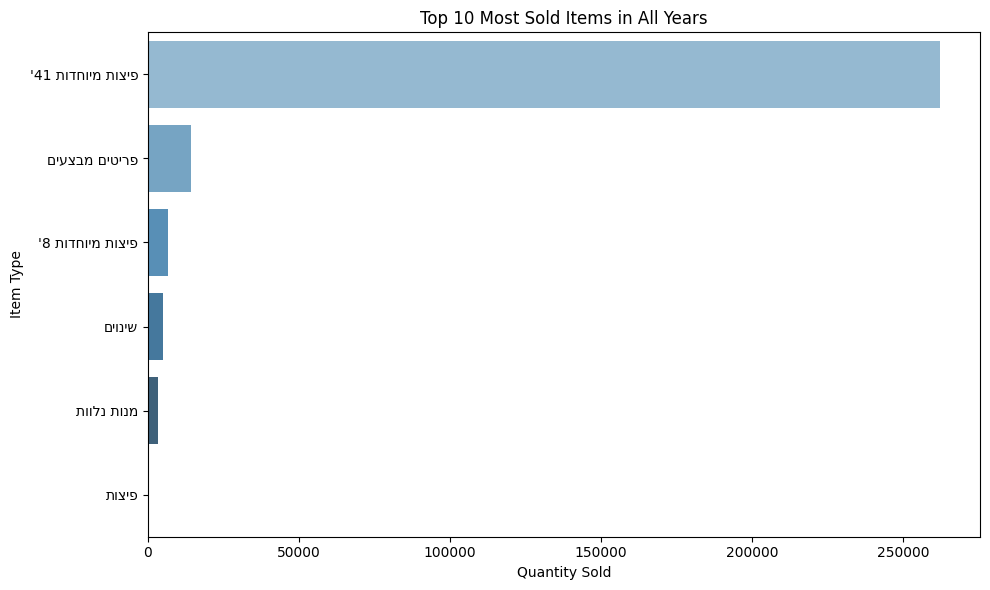

In [47]:
# Agrupamos, ordenamos y tomamos el top 10
item_sales = (
    df.groupby('תאור סוג')['כמות']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Renombramos columnas para visualización
item_sales.columns = ['Item Type', 'Quantity Sold']

# Invertimos el texto hebreo para visualización correcta
item_sales['Item Type'] = item_sales['Item Type'].apply(lambda x: x[::-1])

# Gráfico horizontal
plt.figure(figsize=(10,6))
sns.barplot(data=item_sales, y='Item Type', x='Quantity Sold', palette='Blues_d')
plt.title("Top 10 Most Sold Items in All Years")
plt.xlabel("Quantity Sold")
plt.ylabel("Item Type")
plt.tight_layout()
plt.show()


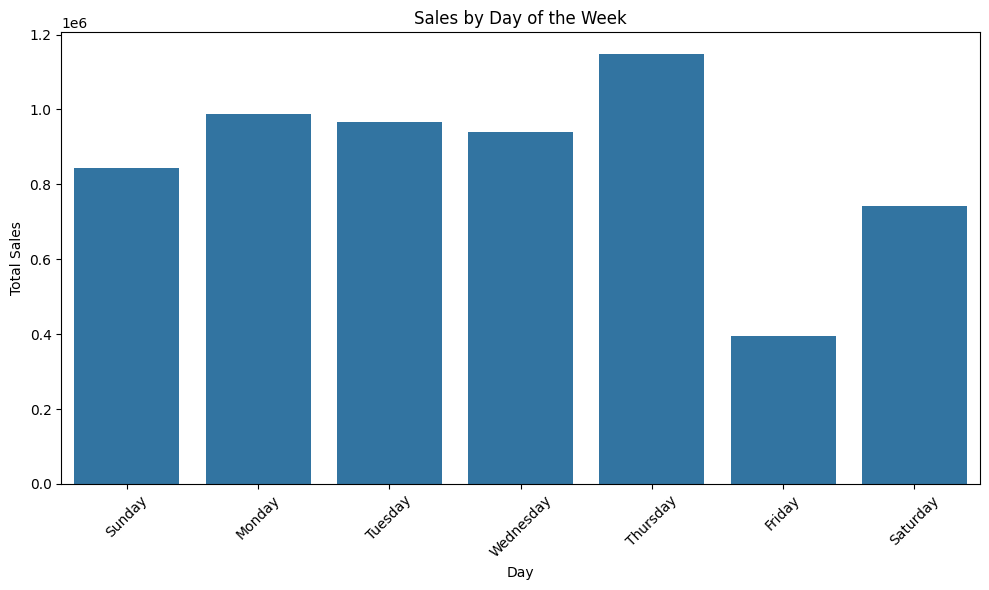

In [48]:
# Crear columna con el nombre del día de la semana (en inglés)
df['weekday'] = df['date'].dt.day_name()

# Agrupar por día y sumar ventas
weekday_sales = df.groupby('weekday')['סכום'].sum().reset_index()

# Asegurar el orden correcto de los días
from pandas.api.types import CategoricalDtype
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_type = CategoricalDtype(categories=weekday_order, ordered=True)
weekday_sales['weekday'] = weekday_sales['weekday'].astype(weekday_type)
weekday_sales = weekday_sales.sort_values('weekday')

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(data=weekday_sales, x='weekday', y='סכום')
plt.title("Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


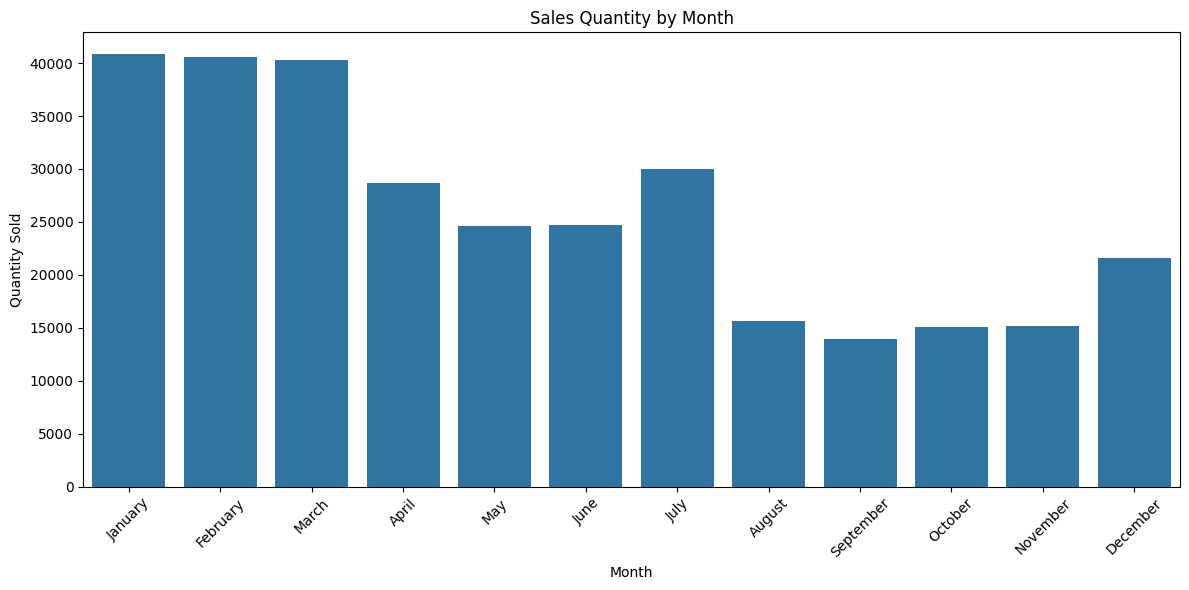

In [75]:
# Crear columna de mes con nombre
df['month_name'] = df['date'].dt.month_name()

# Agrupar por nombre del mes y sumar cantidad
monthly_sales = df.groupby('month_name')['כמות'].sum().reset_index()

# Ordenar los meses correctamente
from pandas.api.types import CategoricalDtype
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_type = CategoricalDtype(categories=month_order, ordered=True)
monthly_sales['month_name'] = monthly_sales['month_name'].astype(month_type)
monthly_sales = monthly_sales.sort_values('month_name')

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_sales, x='month_name', y='כמות')
plt.title("Sales Quantity by Month")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

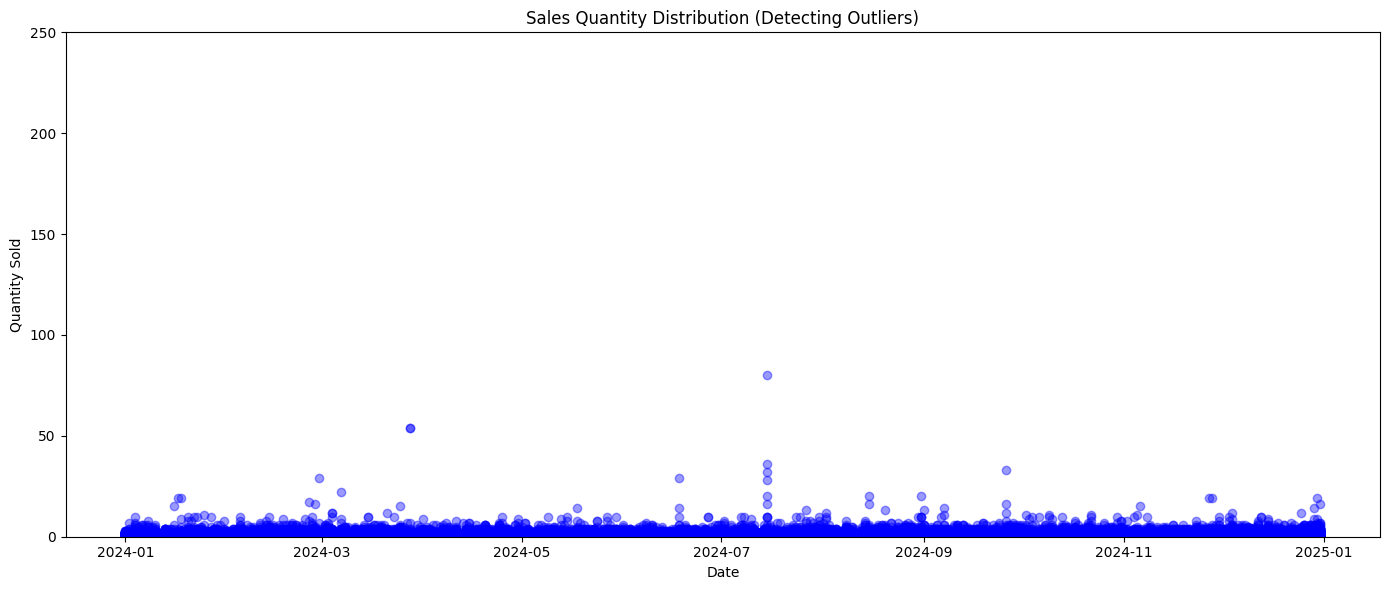

In [52]:
# Filtramos por año 2024
df_2024 = df[df['date'].dt.year == 2024]

# Graficamos la cantidad vendida por día como scatter
plt.figure(figsize=(14,6))
plt.scatter(df_2024['date'], df_2024['כמות'], alpha=0.4, color='blue')
plt.title("Sales Quantity Distribution (Detecting Outliers)")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.ylim(0, 250)  # Ajustá el límite superior si querés resaltar valores extremos
plt.tight_layout()
plt.show()

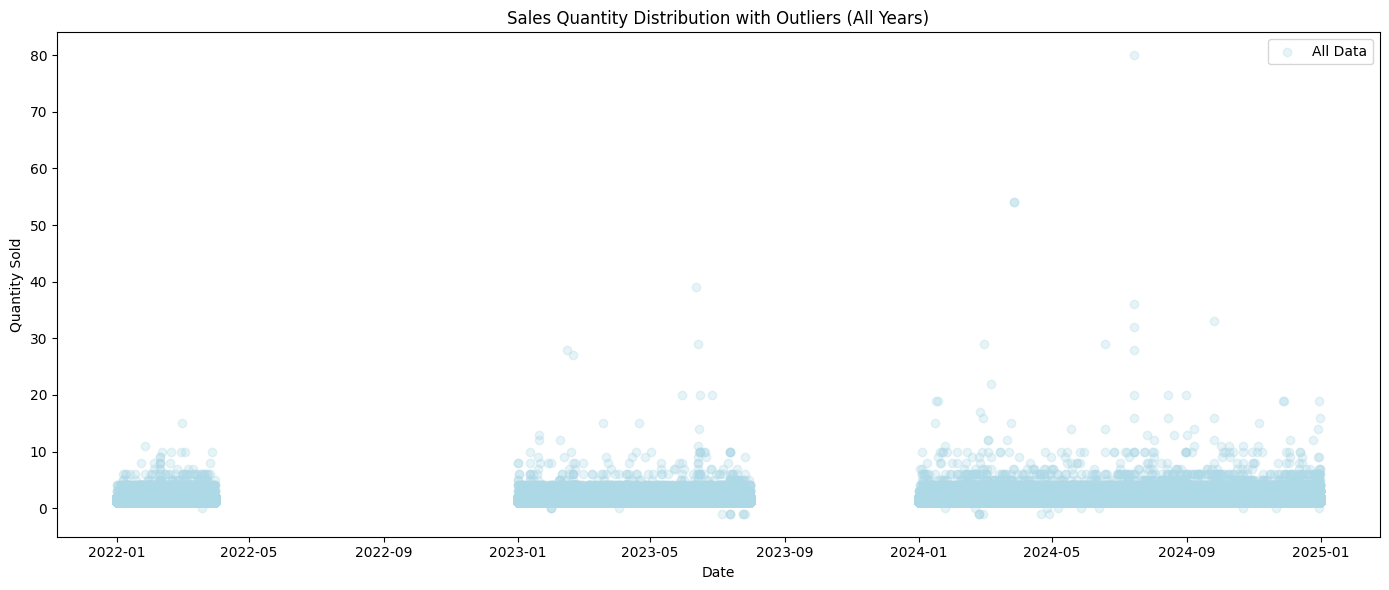

In [55]:
# Calcular el umbral de outliers (por ejemplo, top 1%)
threshold = df['כמות'].quantile(0.99)

# Filtrar outliers
#outliers = df[df['כמות'] > threshold]

# Gráfico scatter de todos los datos + resaltado de outliers
plt.figure(figsize=(14,6))
plt.scatter(df['date'], df['כמות'], alpha=0.3, color='lightblue', label='All Data')
#plt.scatter(outliers['date'], outliers['כמות'], color='red', label='Outliers')
plt.title("Sales Quantity Distribution with Outliers (All Years)")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.legend()
plt.tight_layout()
plt.show()

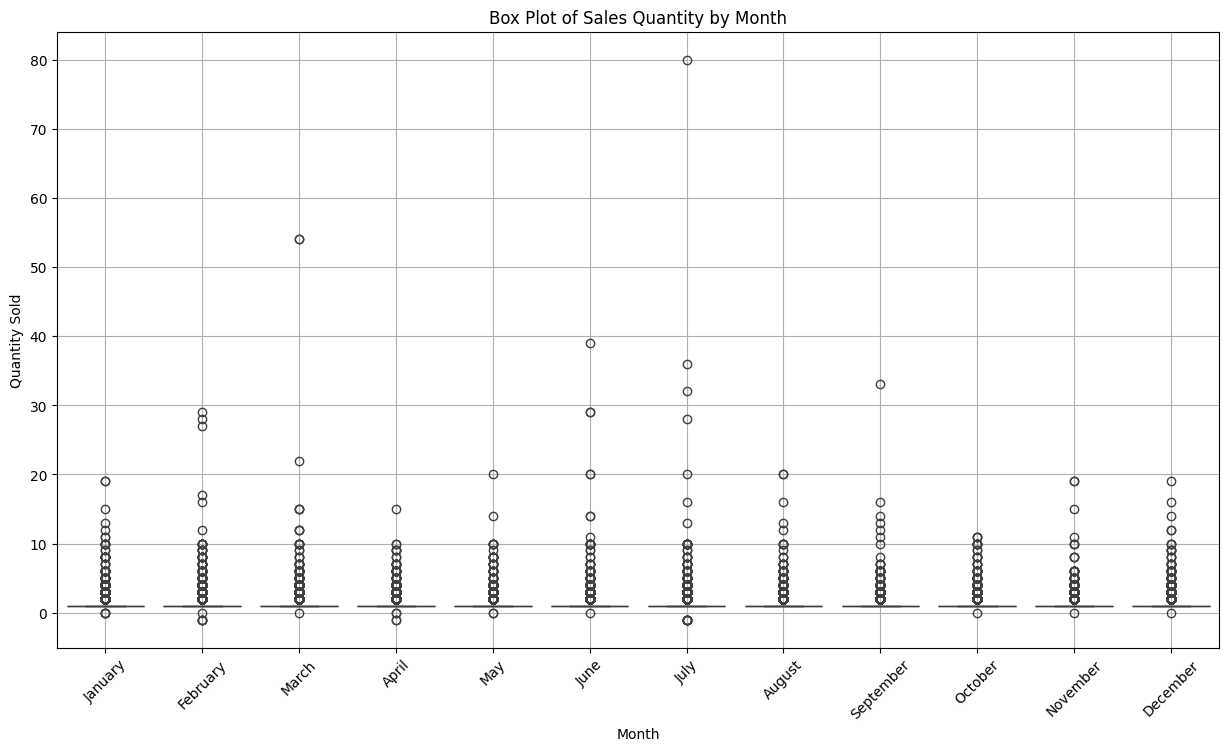

In [66]:
# Box plot for sales quantity per month
plt.figure(figsize=(15, 8))
sns.boxplot(x='month_name', y='כמות', data=df, order=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Customizing the plot
plt.title('Box Plot of Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

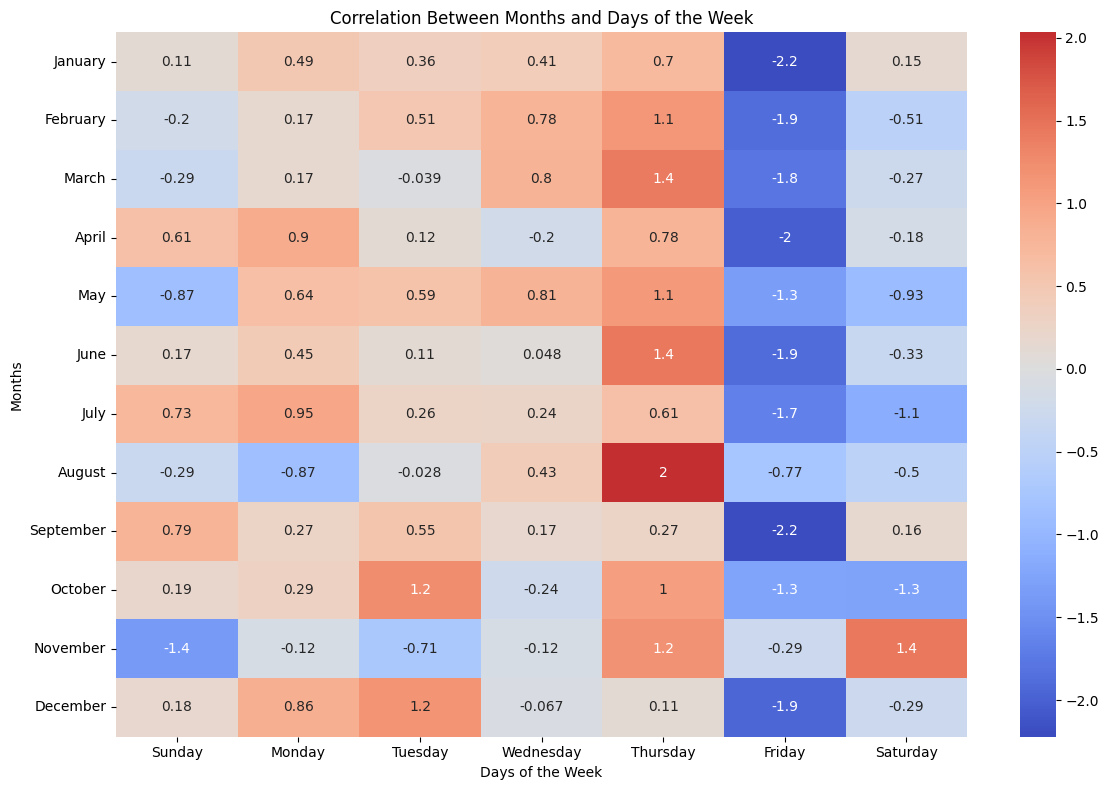

In [57]:
# Crear columnas auxiliares
df['month_name'] = df['date'].dt.month_name()
df['weekday_name'] = df['date'].dt.day_name()

# Agrupar por mes y día de la semana, sumando cantidad vendida
pivot_table = df.pivot_table(
    index='month_name',
    columns='weekday_name',
    values='כמות',
    aggfunc='sum',
    fill_value=0
)

# Asegurar el orden correcto
from pandas.api.types import CategoricalDtype
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
pivot_table = pivot_table.reindex(index=month_order, columns=weekday_order)

# Normalizamos por mes para obtener correlaciones visuales
pivot_corr = pivot_table.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# Graficar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Months and Days of the Week")
plt.xlabel("Days of the Week")
plt.ylabel("Months")
plt.tight_layout()
plt.show()

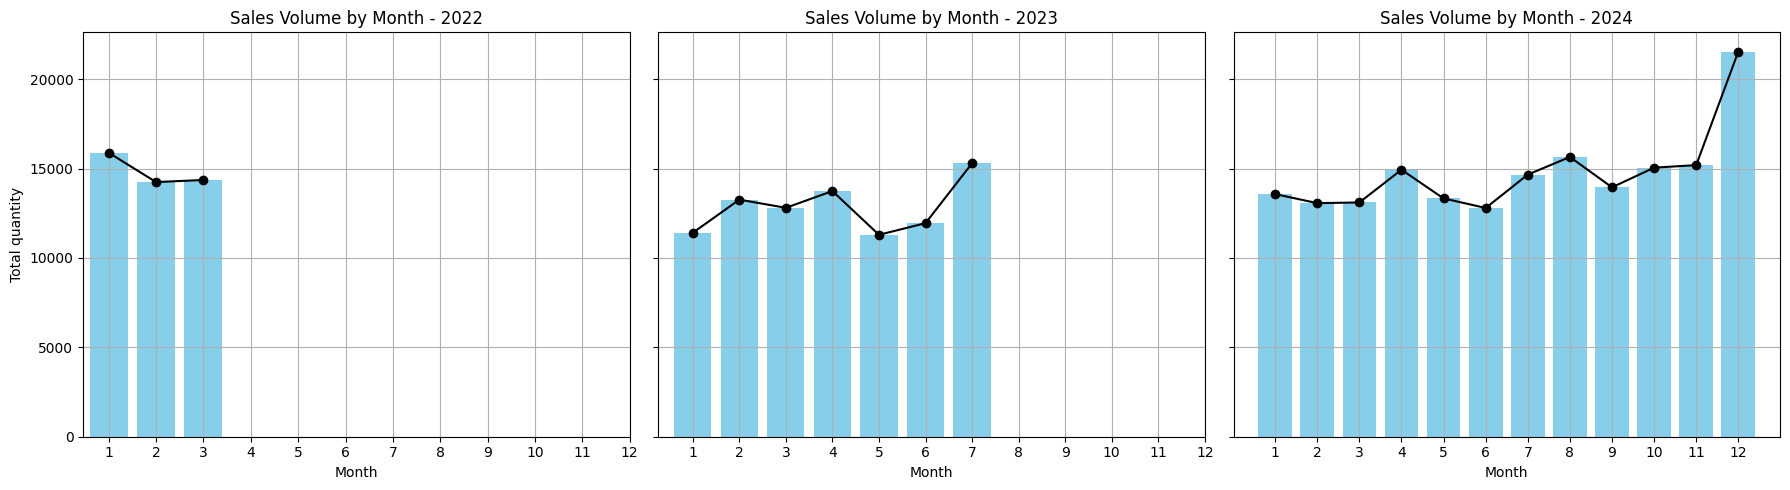

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertimos a datetime y extraemos año y mes
df['תאריך'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['תאריך'].dt.year
df['Month'] = df['תאריך'].dt.month

# Filtramos solo años válidos (sin NaN en 'Year')
valid_years = df['Year'].dropna().unique()
valid_years = sorted([int(y) for y in valid_years])

# Creamos los subplots (uno por año)
fig, axes = plt.subplots(1, len(valid_years), figsize=(6 * len(valid_years), 5), sharey=True)

# Si hay un solo gráfico, lo convertimos en lista para iterar
if len(valid_years) == 1:
    axes = [axes]

# Generamos cada gráfico por año
for ax, year in zip(axes, valid_years):
    df_year = df[df['Year'] == year]
    monthly_sales = df_year.groupby('Month')['כמות'].sum().reset_index()

    ax.bar(monthly_sales['Month'], monthly_sales['כמות'], color='skyblue', label='Total quantity')
    ax.plot(monthly_sales['Month'], monthly_sales['כמות'], color='black', marker='o', label='Trend')
    ax.set_title(f'Sales Volume by Month - {year}')
    ax.set_xlabel('Month')
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    if ax == axes[0]:
        ax.set_ylabel('Total quantity')

plt.tight_layout()
plt.show()

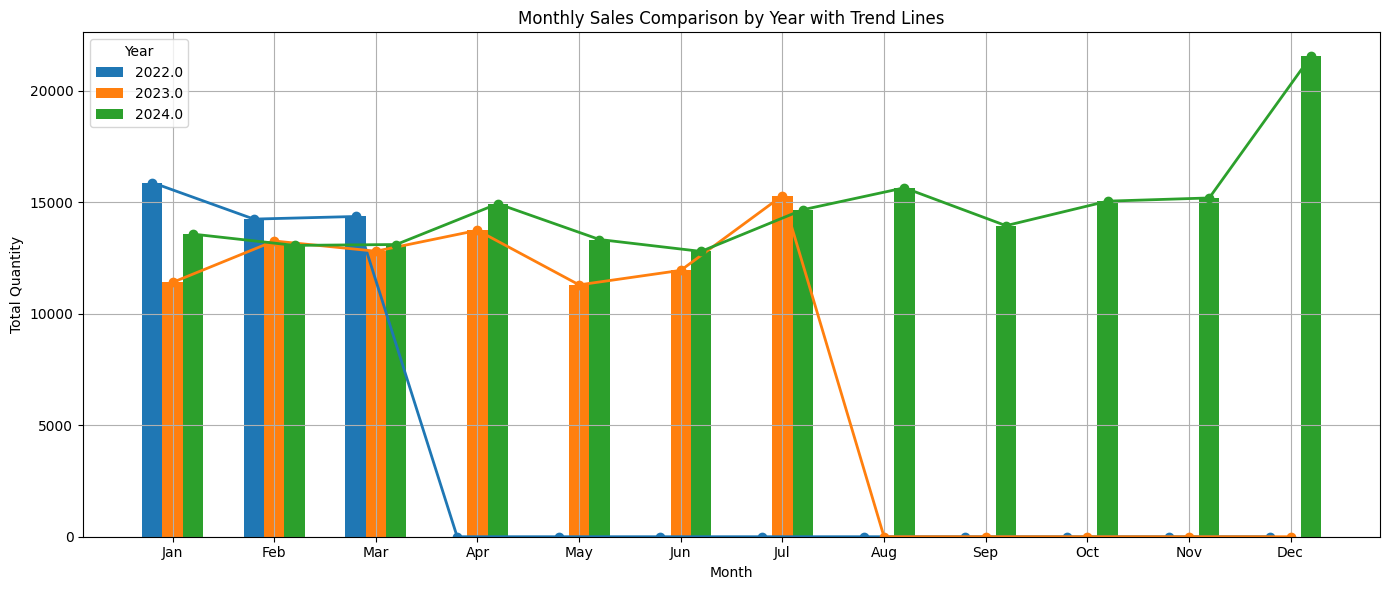

In [80]:
# Asegúrate de que 'תאריך' esté bien formateada
df['תאריך'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['תאריך'].dt.year
df['Month'] = df['תאריך'].dt.month

# Agrupar por Año y Mes
monthly_sales = df.groupby(['Year', 'Month'])['כמות'].sum().reset_index()

# Crear pivot con los años como columnas
sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='כמות').fillna(0)
sales_pivot = sales_pivot.sort_index()

# Configurar gráfico
plt.figure(figsize=(14, 6))
width = 0.2
months = np.arange(1, 13)
years = sales_pivot.columns.tolist()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

# Dibujar barras y líneas de tendencia
for i, year in enumerate(years):
    # Posición desplazada de barras para cada año
    offset = months + width * i
    values = sales_pivot[year].values

    # Barras
    plt.bar(offset, values, width=width, label=str(year), color=colors[i % len(colors)])

    # Línea de tendencia sobre las barras
    plt.plot(offset, values, marker='o', color=colors[i % len(colors)], linestyle='-', linewidth=2)

# Ejes y etiquetas
plt.xticks(months + width * (len(years)-1) / 2, [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Monthly Sales Comparison by Year with Trend Lines')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()